In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [48]:
data=pd.read_csv('/content/drive/MyDrive/ML/insurance.csv')
data = data.rename(columns={'sex': 'gender'})
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
print(f'Number of rows: {data.shape[0]}, columns: {data.shape[1]}')

Number of rows: 1338, columns: 7


In [51]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
data.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [53]:
duplicates = data.duplicated(keep=False)
num_duplicates = duplicates.sum()
duplicate_rows = data[duplicates]
print(f'Number of duplicates: {num_duplicates}')
print(duplicate_rows)

Number of duplicates: 2
     age gender    bmi  children smoker     region    charges
195   19   male  30.59         0     no  northwest  1639.5631
581   19   male  30.59         0     no  northwest  1639.5631


In [54]:
data = data.drop_duplicates()
print(f'Number of rows: {data.shape[0]}, columns: {data.shape[1]}')

Number of rows: 1337, columns: 7


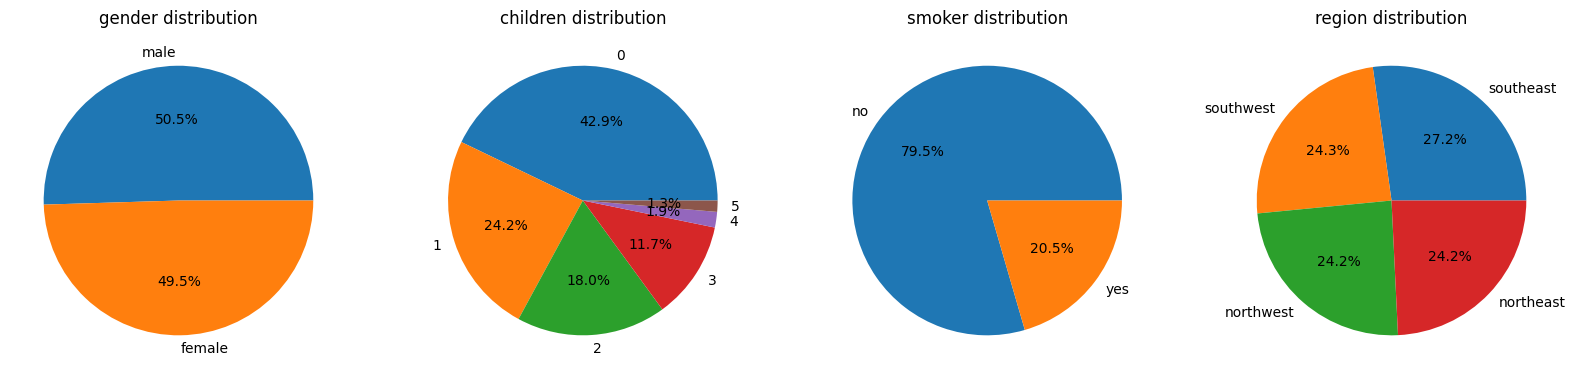

In [55]:
features = ['gender', 'children', 'smoker', 'region']

plt.subplots(1, 4, figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)
    x = data[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
    plt.title(f'{col} distribution')
plt.show()

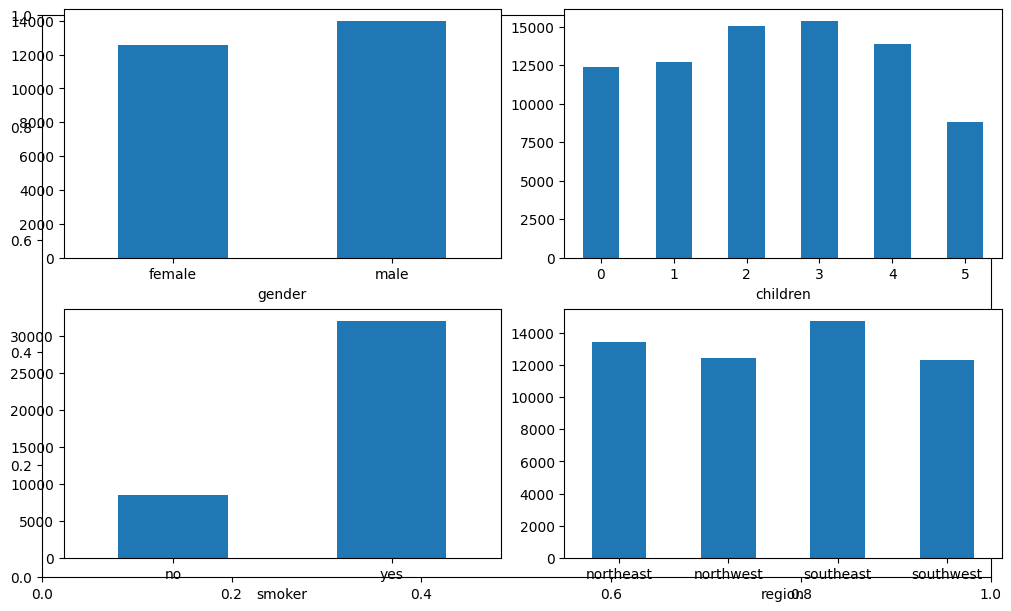

In [56]:
features = ['gender', 'children', 'smoker', 'region']

plt.subplots(figsize=(10, 6), layout='constrained')
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data.groupby(col)['charges'].mean().plot.bar(rot=0)
plt.show()

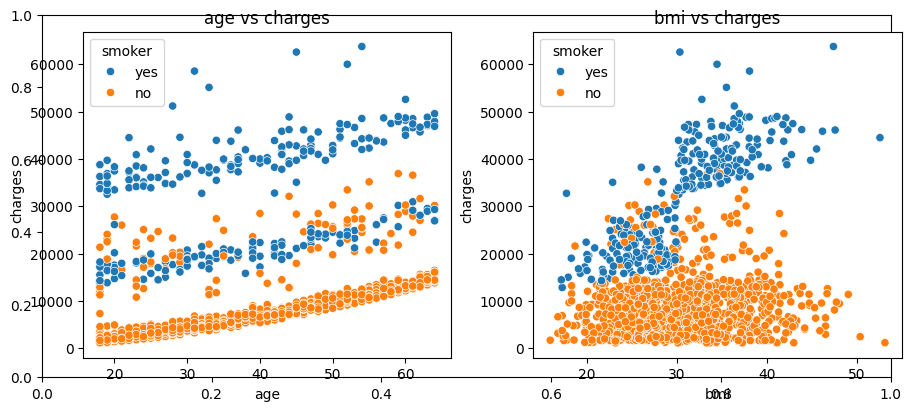

In [57]:
features = ['age', 'bmi']

plt.subplots(figsize=(9, 4), layout='constrained')
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data, x=col,y='charges', hue='smoker')
    plt.title(f'{col} vs charges')
plt.show()

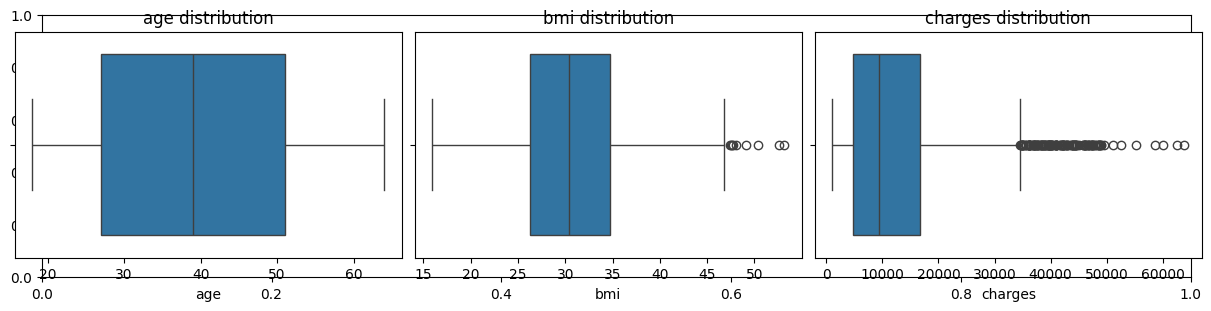

In [58]:
features = ['age', 'bmi', 'charges']

plt.subplots(figsize=(12, 3), layout='constrained')
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data, x=col)
    plt.title(f'{col} distribution')
plt.show()

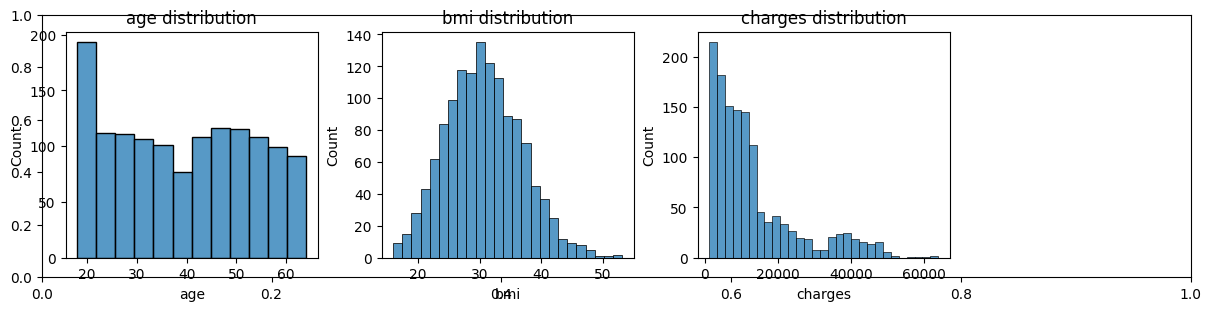

In [59]:
features = ['age', 'bmi', 'charges']

plt.subplots(figsize=(12, 3), layout='constrained')
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data, x=col)
    plt.title(f'{col} distribution')
plt.show()

In [61]:
from scipy.stats import skew

features = ['age', 'bmi', 'charges']

for col in features:
    s = skew(data[col])
    if s >= -0.5 and s <= 0.5:
        print(f'Skewness of {col} = {s:.6f} [low or approximately symmetric]')
    elif s <= -1:
        print(f'Skewness of {col} = {s:.6f} [highly left skewed]')
    elif s >= 1:
        print(f'Skewness of {col} = {s:.6f} [highly right skewed]')
    else:
        print(f'Skewness of {col} = {s:.6f} [moderately skewed]')


Skewness of age = 0.054719 [low or approximately symmetric]
Skewness of bmi = 0.283596 [low or approximately symmetric]
Skewness of charges = 1.513690 [highly right skewed]


In [63]:
from scipy.stats import kurtosis
features = ['age', 'bmi', 'charges']

for col in features:
    k = kurtosis(data[col], fisher=False)
    if k == 3:
        print(f'Kurtosis of {col} = {k:.6f} [perfect normal distribution or very close to it]')
    elif k < 3:
        print(f'Kurtosis of {col} = {k:.6f} [flat peak, light tails]')
    else:
        print(f'Kurtosis of {col} = {k:.6f} [sharp peak, heavy tails]')

Kurtosis of age = 1.755758 [flat peak, light tails]
Kurtosis of bmi = 2.942766 [flat peak, light tails]
Kurtosis of charges = 4.593743 [sharp peak, heavy tails]


**DATA PROCESSING**

In [66]:

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
encoded = data.copy()

encoded['gender'] = encoded['gender'].map({'male': 1, 'female': 0})
encoded['smoker'] = encoded['smoker'].map({'yes': 1, 'no': 0})

# Ordinal encoding
enc = OrdinalEncoder()
encoded['region'] = enc.fit_transform(encoded[['region']])

encoded.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3.0,16884.92400
1,18,1,33.770,1,0,2.0,1725.55230
2,28,1,33.000,3,0,2.0,4449.46200
3,33,1,22.705,0,0,1.0,21984.47061
4,32,1,28.880,0,0,1.0,3866.85520


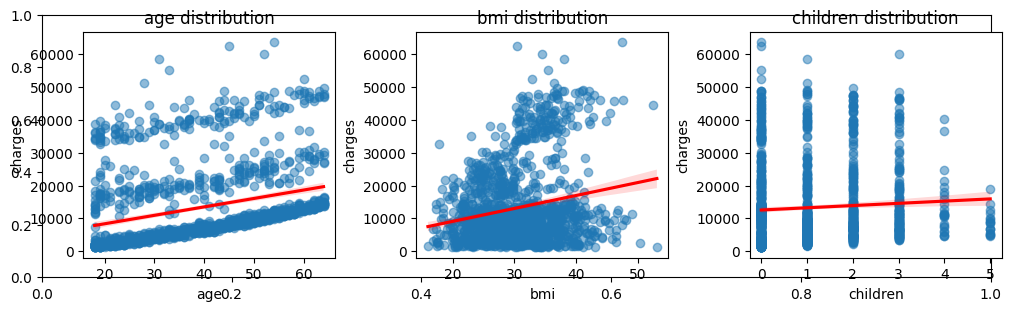

In [67]:
features = ['age', 'bmi', 'children']

plt.subplots(figsize=(10, 3), layout='constrained')
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.regplot(data, x=col, y='charges', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
    plt.title(f'{col} distribution')
plt.show()

**PEARSON CORRELATION**

In [68]:
encoded[['age', 'bmi', 'children', 'charges']].corr()['charges'].sort_values(ascending=False).round(6)

,charges
charges,1.000000
age,0.298308
bmi,0.198401
children,0.067389


**SPEARMAN'S RANK CORRELATION**

In [69]:
encoded[['age', 'bmi', 'children', 'charges']].corr(method='spearman')['charges'].sort_values(ascending=False).round(6)

,charges
charges,1.000000
age,0.533523
children,0.132200
bmi,0.119585


**Kendall’s Tau Rank Correlation**

In [70]:
encoded[['age', 'bmi', 'children', 'charges']].corr(method='kendall')['charges'].sort_values(ascending=False).round(6)

,charges
charges,1.000000
age,0.474688
children,0.102232
bmi,0.082702


**Categorical Variables**

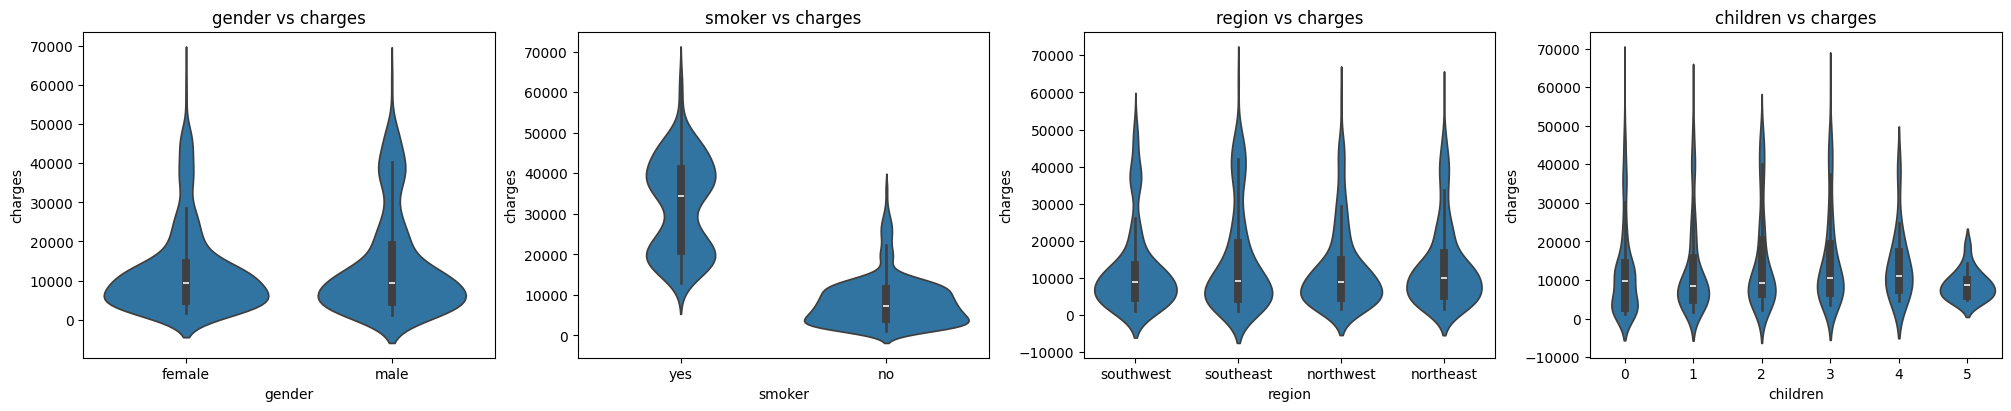

In [71]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4), layout='constrained')
for idx, x in enumerate(['gender', 'smoker', 'region', 'children']):
    sns.violinplot(data, x=x, y='charges', ax=ax[idx])
    ax[idx].set_title(f'{x} vs charges')
plt.show()

In [74]:
import numpy as np
from scipy.stats import chi2_contingency
def calculate_chi2_for_variable(data, independent_variable, dependent_variable):
    df = encoded.copy()
    df[f'{dependent_variable}_category'] = pd.cut(df[dependent_variable], bins=5)
    df = df.groupby(f'{dependent_variable}_category')[independent_variable].value_counts().unstack()
    list = []
    for category in data[independent_variable].unique():
        category = np.array(df[category])
        list.append(category)
    contingency_table = np.array(list)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'For variable {independent_variable}: chi2 = {chi2:.6f}, p-value = {p:.6f}')

for x in ['gender', 'smoker', 'region', 'children']:
    calculate_chi2_for_variable(encoded, x, 'charges')

For variable gender: chi2 = 9.345654, p-value = 0.053017
For variable smoker: chi2 = 885.732642, p-value = 0.000000
For variable region: chi2 = 21.116012, p-value = 0.048707
For variable children: chi2 = 27.541453, p-value = 0.120706


In [77]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
X = encoded.drop(columns=['charges'])
y = encoded['charges']
feature_names = X.columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso model
lasso = Lasso(alpha=0.1)  # Adjust the alpha value to control the regularization strength
lasso.fit(X_train, y_train)

# Perform feature selection using SelectFromModel
selector = SelectFromModel(lasso, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print the names of selected features
selected_feature_names = [feature_names[i] for i, selected in enumerate(selector.get_support()) if selected]
print("Selected Feature Names:", selected_feature_names)

# Train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Selected Feature Names: ['age', 'gender', 'bmi', 'children', 'smoker', 'region']
Root Mean Squared Error: 5957.608799816459
R2 Score: 0.8068466322629112


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
X = encoded.drop(columns=['charges'])
y = encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    # Cross validation
    mean_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    mean_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    results.append([name, mean_rmse, mean_r2, test_rmse, test_r2])
df = pd.DataFrame(results, columns=['model', 'mean_rmse', 'mean_r2', 'test_rmse', 'test_r2'])
print(df)

               model    mean_rmse   mean_r2    test_rmse   test_r2
0  Linear Regression  6125.628863  0.725852  5957.608800  0.806847
1      Random Forest  5021.969296  0.816305  4628.266032  0.883428
2  Gradient Boosting  4776.677368  0.833797  4262.658690  0.901117
3      Decision Tree  6895.338366  0.651102  6339.107593  0.781317
4       XGBRegressor  5460.274565  0.782119  4932.711851  0.867587


In [80]:
X = encoded.drop(columns=['charges'])
y = encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {'n_estimators': [200, 250, 300],
                   'max_depth': [3, 4, 5]}},
     'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {'n_estimators': [50, 100, 150],
                   'learning_rate': [0.03, 0.04, 0.05],
                   'max_depth': [2, 3, 4]}},
     'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {'max_depth': [3, 4, 5]}},
     'XGBRegressor': {
        'model': XGBRegressor(random_state=42),
        'params': {'n_estimators': [80, 100, 120],
                   'max_depth': [2, 3, 4],
                   'learning_rate': [0.03, 0.04, 0.05],
                   'gamma': [0, 1, 2]}}}
best_scores = {}
best_params = {}
test_scores = {}

for name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)

    # Corrected lines
    best_scores[name] = round(grid_search.best_score_, 6)
    best_params[name] = grid_search.best_params_
    test_score = grid_search.score(X_test, y_test)
    test_scores[name] = round(test_score, 6)
for name in models.keys():
    print(f'{name} - Best Score: {best_scores[name]}')
    print(f'Best Parameters: {best_params[name]}')
    print(f'Test Score: {test_scores[name]}\n')

Random Forest - Best Score: 0.843304
Best Parameters: {'max_depth': 4, 'n_estimators': 250}
Test Score: 0.901484

Gradient Boosting - Best Score: 0.843903
Best Parameters: {'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 100}
Test Score: 0.901082

Decision Tree - Best Score: 0.832562
Best Parameters: {'max_depth': 4}
Test Score: 0.898111

XGBRegressor - Best Score: 0.846228
Best Parameters: {'gamma': 0, 'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 100}
Test Score: 0.901692



In [81]:
X = encoded.drop(columns=['charges'])
y = encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = XGBRegressor(random_state=42, gamma=0, learning_rate=0.04, max_depth=3, n_estimators=100)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("Test R2 Score:", r2)

mean_rmse = np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_squared_error').mean())
print("CV Root Mean Squared Error:", mean_rmse)
mean_r2 = cross_val_score(final_model, X, y, cv=5, scoring='r2').mean()
print("CV R2 Score:", mean_r2)

Test Root Mean Squared Error: 4250.254125195574
Test R2 Score: 0.9016921687836021
CV Root Mean Squared Error: 4459.060221014669
CV R2 Score: 0.862866629129978


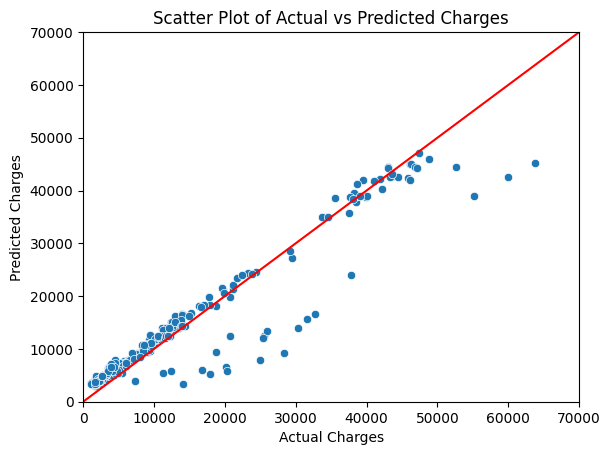

In [82]:
sns.scatterplot(x=y_test, y=y_pred)
diagonal_x = np.linspace(0, 70000, 100)
diagonal_y = diagonal_x
plt.plot(diagonal_x, diagonal_y, color='red')
plt.xlim(0, 70000)
plt.ylim(0, 70000)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Scatter Plot of Actual vs Predicted Charges')
plt.show()

**FEATURE IMPORTANCE**

In [83]:
important_features = pd.DataFrame(
    data=final_model.feature_importances_,
    index=X.columns,
    columns=['Importance']
).sort_values(by='Importance', ascending=False)
print(important_features)

          Importance
smoker      0.807635
bmi         0.124382
age         0.045967
children    0.011521
region      0.005544
gender      0.004951


**SAVE THE MODEL**

In [84]:
from pickle import dump

dump(final_model, open('insurance_model.pkl', 'wb'))

**Predict on New Data**

In [85]:
new_data = pd.DataFrame({
    'age': 30, 'gender': 'female', 'bmi': 24.920, 'children': 0, 'smoker': 'no', 'region': 'southeast',
}, index=[0])

new_data['gender'] = new_data['gender'].map({'male': 1, 'female': 0})
new_data['smoker'] = new_data['smoker'].map({'yes': 1, 'no': 0})
new_data['region'] = enc.transform(new_data[['region']])

print('Predicted Charge:', final_model.predict(new_data))

Predicted Charge: [4462.9775]


In [91]:
!pip install lime
import lime
import numpy as np
import sklearn.ensemble
import lime.lime_tabular
import IPython
from sklearn import datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=61be48eec374dd293994b8f6745afb3e8318b5f298362b88ecdfa7f1bbb5bcba
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [94]:
!pip install shap
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook


NameError: name 'rf_clf' is not defined

In [95]:
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)

NameError: name 'rf_clf' is not defined